# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# 2
features = pd.read_csv('./txt/features.txt', sep='\s+', header=None, names=['index', 'feature_name'])
feature_names = features['feature_name'].values  # Pegar somente os nomes das variáveis

In [3]:
#3 Carregar subject_train.txt
subject_train = pd.read_csv('./txt/subject_train.txt', header=None, names=['subject'])

In [4]:
# 4 Carregar X_train.txt
X_train = pd.read_csv('./txt/X_train.txt', delim_whitespace=True, header=None)
# 4.1 Atribuir os nomes das variáveis às colunas do DataFrame
X_train.columns = feature_names
#4.2 Adicionar a coluna de sujeito
X_train['subject'] = subject_train
#4.3 Adicionar o índice duplo
X_train.set_index([X_train.index, 'subject'], inplace=True)

<ipython-input-4-5930513e2cd7>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('./txt/X_train.txt', delim_whitespace=True, header=None)


In [5]:
#5 Carregar subject_test.txt
subject_test = pd.read_csv('./txt/subject_test.txt', header=None, names=['subject'])

# 5.1 Carregar X_test.txt
X_test = pd.read_csv('./txt/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = feature_names

# 5.2 Adicionar a coluna de sujeito
X_test['subject'] = subject_test

# 5.3 Adicionar o índice duplo
X_test.set_index([X_test.index, 'subject'], inplace=True)

<ipython-input-5-5318a72162f8>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('./txt/X_test.txt', delim_whitespace=True, header=None)


In [6]:
# 6 Salvar as bases
X_train.to_csv('X_train_processed.csv')
X_test.to_csv('X_test_processed.csv')

In [7]:
'''
# 6 (collab)
from google.colab import files
files.download('./txt/X_train_processed.csv')
files.download('./txt/X_test_processed.csv')
'''

"\n# 6 (collab)\nfrom google.colab import files\nfiles.download('./txt/X_train_processed.csv')\nfiles.download('./txt/X_test_processed.csv')\n"

In [8]:
X_train_selected = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
X_test_selected = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [9]:
# Definir a árvore de decisão
tree = DecisionTreeClassifier(min_samples_leaf=20)

# Carregar y_train
y_train = pd.read_csv('./txt/y_train.txt', header=None, names=['activity'])

# Ajustar a árvore de decisão
tree.fit(X_train_selected, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

In [10]:
%%time
# Poda de custo-complexidade (CCP)
path = tree.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas_unique = pd.unique(ccp_alphas[ccp_alphas > 0])  # Filtrar valores positivos e únicos

ccp_alphas_subset = ccp_alphas_unique[::5]  # Selecionar 1 a cada 5 valores

CPU times: user 53 ms, sys: 0 ns, total: 53 ms
Wall time: 192 ms


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [11]:
# 3.1

%%time
trees = []
for alpha in ccp_alphas_subset:
    tree = DecisionTreeClassifier(ccp_alpha=alpha, min_samples_leaf=20)
    tree.fit(X_train_selected, y_train)
    trees.append(tree)

CPU times: user 2.3 s, sys: 4.82 ms, total: 2.3 s
Wall time: 2.45 s


In [12]:
# Carregar y_test
y_test = pd.read_csv('./txt/y_test.txt', header=None, names=['activity'])


#3.2

accuracies_train = [accuracy_score(y_train, tree.predict(X_train_selected)) for tree in trees]
accuracies_test = [accuracy_score(y_test, tree.predict(X_test_selected)) for tree in trees]

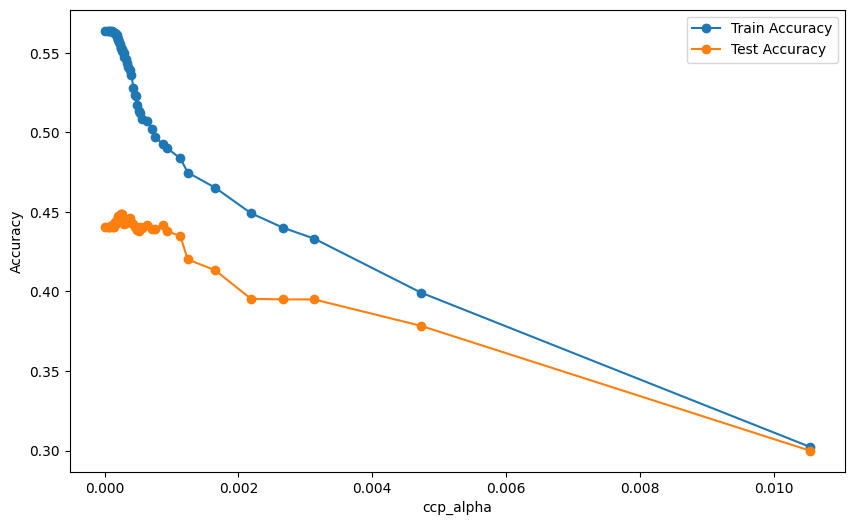

In [13]:
#3.3

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_subset, accuracies_train, label="Train Accuracy", marker='o')
plt.plot(ccp_alphas_subset, accuracies_test, label="Test Accuracy", marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
best_index = accuracies_test.index(max(accuracies_test))
best_tree = trees[best_index]
best_accuracy = max(accuracies_test)
print(f"Melhor acurácia: {best_accuracy}")

Melhor acurácia: 0.44859178825924667


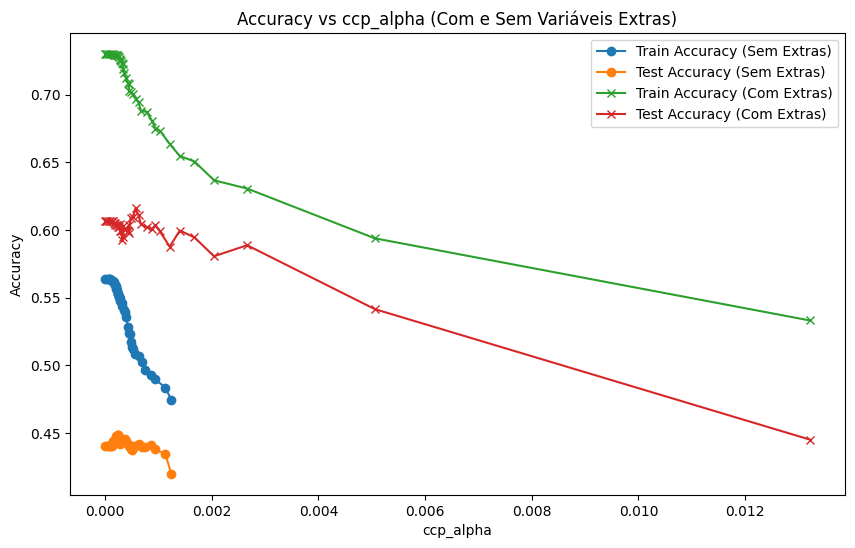


Melhor árvore com variáveis extras: ccp_alpha=0.000573683292786592, acurácia=0.6158805564981337


In [15]:
# Adicionar variáveis extras ('tBodyAcc-std()-X', 'tBodyAcc-std()-Y')
X_train_selected_extra = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y']]
X_test_selected_extra = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y']]

# Ajustar a árvore de decisão com variáveis extras
tree_extra = DecisionTreeClassifier(min_samples_leaf=20)
tree_extra.fit(X_train_selected_extra, y_train)

# Calcular o caminho de poda (ccp_alphas) para variáveis extras
path_extra = tree_extra.cost_complexity_pruning_path(X_train_selected_extra, y_train)
ccp_alphas_extra = path_extra.ccp_alphas
ccp_alphas_unique_extra = pd.unique(ccp_alphas_extra[ccp_alphas_extra > 0])
ccp_alphas_subset_extra = ccp_alphas_unique_extra[::5]

# Rodar uma árvore para cada ccp_alpha com variáveis extras
trees_extra = []
for alpha in ccp_alphas_subset_extra:
    tree = DecisionTreeClassifier(ccp_alpha=alpha, min_samples_leaf=20)
    tree.fit(X_train_selected_extra, y_train)
    trees_extra.append(tree)

# Calcular a acurácia para cada árvore com variáveis extras
accuracies_train_extra = [accuracy_score(y_train, tree.predict(X_train_selected_extra)) for tree in trees_extra]
accuracies_test_extra = [accuracy_score(y_test, tree.predict(X_test_selected_extra)) for tree in trees_extra]


# Garantir que ccp_alphas_subset_extra tenha o mesmo tamanho de ccp_alphas_subset
min_length = min(len(ccp_alphas_subset), len(ccp_alphas_subset_extra))
ccp_alphas_subset = ccp_alphas_subset[:min_length]
ccp_alphas_subset_extra = ccp_alphas_subset_extra[:min_length]

# Garantir que as listas de acurácias também sejam ajustadas para ter o mesmo tamanho
accuracies_train = accuracies_train[:min_length]
accuracies_test = accuracies_test[:min_length]
accuracies_train_extra = accuracies_train_extra[:min_length]
accuracies_test_extra = accuracies_test_extra[:min_length]

# Plotar o gráfico comparando os dois conjuntos (com e sem variáveis extras)
plt.figure(figsize=(10, 6))

# Sem variáveis extras
plt.plot(ccp_alphas_subset, accuracies_train, label="Train Accuracy (Sem Extras)", marker='o')
plt.plot(ccp_alphas_subset, accuracies_test, label="Test Accuracy (Sem Extras)", marker='o')

# Com variáveis extras
plt.plot(ccp_alphas_subset_extra, accuracies_train_extra, label="Train Accuracy (Com Extras)", marker='x')
plt.plot(ccp_alphas_subset_extra, accuracies_test_extra, label="Test Accuracy (Com Extras)", marker='x')

plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha (Com e Sem Variáveis Extras)')
plt.legend()
plt.show()

# Melhor árvore com variáveis extras
best_index_extra = accuracies_test_extra.index(max(accuracies_test_extra))
print(f"\nMelhor árvore com variáveis extras: ccp_alpha={ccp_alphas_subset_extra[best_index_extra]}, acurácia={accuracies_test_extra[best_index_extra]}")